In [1]:
import pandas as pd
import sys
sys.path.append("../../lib") # Adds higher directory to python modules path.
import helper_functions as hf
import analysis
PATH = "../../data/"

In [2]:
optimisation_result = hf.load_pickle(f'{PATH}pickle/Principal_Embeddings_Random_Forest/300d_PE_optimisation_result')

/Users/daniel/anaconda3/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/daniel/anaconda3/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.20.3 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [3]:
optimisation_result.keys()

dict_keys(['best_score_', 'best_NLP_gp', 'best_params_', 'best_estimator_', 'X_train', 'X_test', 'NLP_param_grid', 'grid_search_param_grid', 'df_train', 'df_test', 'y_train', 'y_test'])

In [4]:
clf_best = optimisation_result['best_estimator_']
X_train = optimisation_result['X_train']
X_test = optimisation_result['X_test']
y_train = optimisation_result['y_train']
y_test = optimisation_result['y_test']

y_pred = clf_best.predict(X_test)

In [5]:
from sklearn.metrics import accuracy_score

pred_train = clf_best.predict(X_train)
pred_test = clf_best.predict(X_test)

acc_train = accuracy_score(y_train, pred_train)
print('Train accuracy: ', acc_train)

acc_test = accuracy_score(y_test, pred_test)
print('Test accuracy: ', acc_test)

Train accuracy:  1.0
Test accuracy:  0.37089201877934275


In [6]:
print("Nubmer of features:", X_train.shape[1])

Nubmer of features: 1500


In [7]:
len(X_train)

852

In [8]:
len(X_test)

213

In [9]:
optimisation_result['best_params_']

{'max_depth': 30,
 'min_samples_leaf': 1,
 'n_estimators': 1000,
 'random_state': 42}

In [10]:
optimisation_result['best_NLP_gp']

{'desc_n_dirs': 2,
 'desc_stem': False,
 'desc_sw': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  'through',
  'during',
  'before',
  'after',
  'above',
  'below',
  'to',
  'from',
  'up',
  'down',
  'in',
  'out',
  'on',
  'off',

In [11]:
feature_importances = clf_best.feature_importances_
print("{} features are ignored (importance of 0)".format((feature_importances == 0).sum()))
print("{} features are taken into account (non 0)".format((feature_importances != 0).sum()))

0 features are ignored (importance of 0)
1500 features are taken into account (non 0)


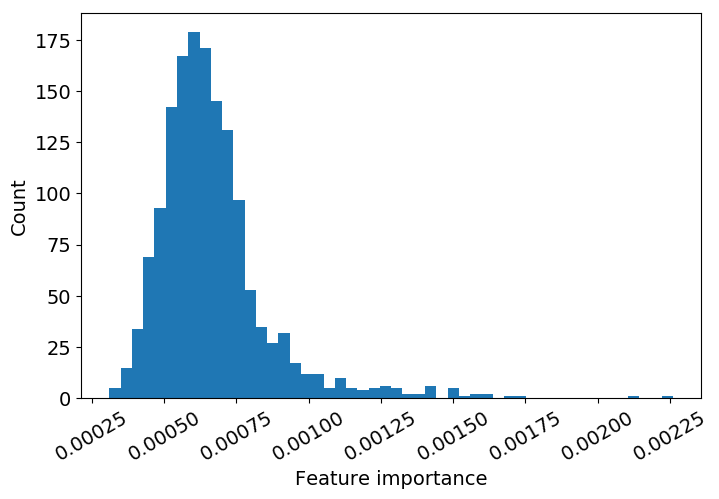

In [12]:
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8, 5))
plt.hist(feature_importances, bins=50)
plt.ylabel('Count')
plt.xlabel('Feature importance')
plt.xticks(rotation=30)
plt.savefig('fimportance_histogram_pe.png', dpi=200, bbox_inches='tight')
plt.show()

In [13]:
class_names = ['0-9.0', '9.0-15.0', '15.0-23.0', '23.0-38.0', '38.0-589.0']

# Plot non-normalized confusion matrix
ax = analysis.plot_confusion_matrix(y_true=y_test, y_pred=y_pred, classes=class_names)
fig = ax.figure
fig.savefig('confusion_matrix_PE.png', dpi=200, bbox_inches='tight')

Confusion matrix, without normalization
[[25  3  1  2  7]
 [ 3 15  7 15  4]
 [ 2 14 15 15  5]
 [ 0 11  6 22  1]
 [ 7 15  4 12  2]]


In [14]:
feature_importances.max()

0.0022603649062204025

In [15]:
feature_importances.min()

0.00031067899873111153

In [16]:
((feature_importances > 0.0004) & (feature_importances < 0.0008)).sum()/len(feature_importances)

0.8353333333333334